This notebook contains the code used to plot the multiple graphs present
in my contribution in the SerpRateAI project.

Firstly for the plotting of correlation matrix between keywords and the whole keywords graph

                                            CORE   SECTION  \
CORE                                    1.000000       NaN   
SECTION                                      NaN  1.000000   
Cell abundance (cells/g)                0.437454  0.015544   
Mean dry electrical Resistivity (ohmm)  0.272045 -0.005182   
Bulk density (g/cm³)                    0.616667  0.004825   
...                                          ...       ...   
Srrecal                                 0.616813 -0.016900   
Redness                                -0.048422  0.044457   
Greenness                               0.306935  0.028322   
Blueness                                0.009128 -0.039688   
Y (luminance)                           0.255938 -0.011374   

                                        Cell abundance (cells/g)  \
CORE                                                    0.437454   
SECTION                                                 0.015544   
Cell abundance (cells/g)                           

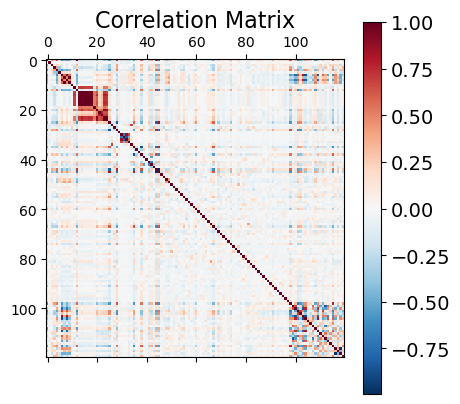

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl

# dataset_path="D:\SerpRateAI\Datasets\Dataset_BA1B_Final.xlsx"
# dataset_path="Datasets\Dataset_BA1B_Final.xlsx"
dataset_path="Datasets/Dataset_BA1B.xlsx"

df = pd.read_excel(dataset_path)

keywords=df.columns[49:]
K=[]
for i in keywords:
    K.append(i)

#plot the correlation matrix

corr=df.corr('spearman', numeric_only=True)
print(corr)
plt.matshow(corr, cmap='RdBu_r')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()



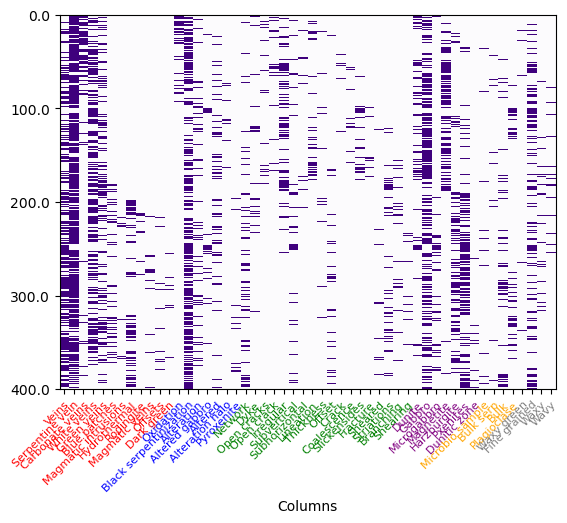

In [2]:
#plot the graph keyword. For coloring each section of a different color, you have to crop by hand the graph for each color then make a little montage.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

data = df[K].to_numpy()
# row_labels = L
row_labels = df.index
col_labels = K

groups = [
    ['Veins', 'Serpentine vein', 'Carbonate veins', 'White veins', 'Green veins',
     'Blue patches', 'Magmatic veins', 'Dark green', 'Magmatic intrusions',
     'Hydrothermal', 'Offsets', 'Rodingite'],
    ['Oxidation', 'Black serpentinization', 'Alteration', 'Alteration halo',
     'Altered gabbro', 'Altered', 'Pyroxenite'],
    ['Network', 'Coalescence', 'Dyke', 'Shearing', 'Crack',  'Open cracks', 'Open crack', 'Irregular', 'Subvertical',
     'Subhorizontal', 'Lineation', 'Thickness', 'Offset', 'Fracture',
     'Sheared', 'Striations', 'Branching', 'Slickensides'],
    ['Dunite', 'Gabbro', 'Microgabbro', 'Harzburgite', 'Pxenites', 'Dunitic zone','Magnetite'],
    ['Plagioclase', 'Microbio sample', 'Bulk serp', 'Bulk'],
    ['Fine grained', 'Waxy green', 'Waxy', 'Wavy']
]

colors = ['red', 'blue', 'green', 'purple', 'orange', 'grey']


sorted_cols = []
group_indices = []
for i, group in enumerate(groups):
    for col in col_labels:
        if col in group:
            sorted_cols.append(col)
            group_indices.append(i)

sorted_data = data[:, [col_labels.index(col) for col in sorted_cols]]

plt.pcolormesh(sorted_data, cmap='Purples')

y_ticks = np.arange(0, 401.7, 100)
y_tick_positions = np.linspace(0, len(row_labels), len(y_ticks))
plt.yticks(y_tick_positions, y_ticks)

plt.xticks(np.arange(len(sorted_cols)) + 0.5, sorted_cols, rotation=45, ha="right", rotation_mode="anchor", fontsize=8)
plt.subplots_adjust(bottom=0.1)

for tick_label in plt.gca().get_xticklabels():
    label = tick_label.get_text()
    for i, group in enumerate(groups):
        if label in group:
            tick_label.set_color(colors[i])

plt.gca().invert_yaxis()

plt.xlabel("Columns")

plt.show()

Then for the plotting of %fractures per depth

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import imageio.v3 as iio
import skimage.color
import skimage.filters
import skimage.measure
from os import listdir

In [5]:
#first we separate the fractures from the background with component analysis

def connected_components(filename, sigma=1.0, t=0.5, connectivity=2):

    # load the image, adjust the path to the images
    segmented_image="D:/SerpRateAI/Results/"+filename+"/"+filename+"_Simple Segmentation_3"+".tif"
    image = iio.imread(segmented_image)

    # convert the image to grayscale
    #gray_image = skimage.color.rgb2gray(image)

    # denoise the image with a Gaussian filter
    blurred_image = skimage.filters.gaussian(image, sigma=sigma)

    # mask the image according to threshold
    binary_mask = blurred_image > t

    # perform connected component analysis
    augm_segm, count = skimage.measure.label(binary_mask,connectivity=connectivity, return_num=True)

    #to return the raw image, adjust the path if needed
    raw_dir="D:/SerpRateAI/Camera/" + filename+'.jpg'
    print(raw_dir)
    raw=iio.imread(raw_dir)

    return augm_segm, count, image, raw


#to assign each % a depth
true_depth_list=[0.0, 0.675, 1.35, 2.7, 3.45, 4.2, 4.95, 5.7, 6.45, 7.2, 7.95, 8.7, 9.45, 10.2, 10.95, 11.7, 12.45, 13.2, 14.7, 15.45, 16.95, 17.7, 18.45, 19.2, 20.7, 21.45, 22.2, 22.95, 23.7, 24.45, 25.2, 25.95, 26.7, 27.45, 28.2, 28.95, 29.7, 30.45, 30.82, 31.2, 31.57, 31.95, 32.32, 32.7, 32.87, 33.04, 33.2, 33.825, 34.45, 35.075, 35.7, 36.45, 37.2, 37.95, 38.7, 39.45, 40.2, 40.95, 41.7, 42.7, 43.2, 43.7, 44.7, 45.45, 46.2, 46.95, 47.7, 48.45, 49.2, 49.95, 50.7, 51.45, 52.2, 52.95, 53.7, 54.45, 55.2, 55.95, 56.7, 57.45, 58.2, 58.95, 59.7, 60.45, 61.2, 61.95, 62.7, 63.45, 64.2, 64.95, 65.7, 66.45, 67.2, 67.95, 68.7, 69.45, 70.2, 70.95, 71.7, 72.45, 73.2, 73.95, 74.7, 75.45, 76.2, 76.95, 77.7, 78.45, 79.2, 79.95, 80.7, 81.45, 82.2, 82.95, 83.7, 84.45, 85.2, 85.95, 86.7, 87.45, 88.2, 88.95, 89.7, 90.45, 91.2, 91.95, 92.7, 93.45, 94.2, 94.95, 95.7, 96.45, 97.2, 97.95, 98.7, 99.45, 100.2, 100.95, 101.7, 102.45, 103.2, 103.95, 104.7, 105.45, 106.2, 106.95, 107.7, 108.45, 109.2, 109.95, 110.7, 111.45, 112.2, 112.95, 113.7, 114.45, 115.2, 115.95, 116.7, 117.45, 118.2, 118.95, 119.7, 120.45, 121.2, 121.95, 122.7, 123.45, 124.2, 124.95, 125.7, 126.45, 127.2, 127.95, 128.7, 129.45, 130.2, 130.95, 131.7, 132.45, 133.2, 133.95, 134.7, 135.45, 136.2, 136.95, 137.7, 138.45, 139.2, 139.95, 140.7, 141.45, 142.2, 142.95, 143.7, 144.45, 145.2, 145.95, 146.7, 147.45, 148.2, 148.95, 149.7, 150.45, 151.2, 151.95, 152.7, 153.45, 154.2, 154.95, 155.7, 156.45, 157.2, 157.95, 158.7, 159.45, 160.2, 160.95, 161.7, 162.45, 163.2, 163.95, 164.7, 165.45, 166.2, 166.95, 167.7, 168.45, 169.2, 169.95, 170.7, 171.45, 172.2, 172.95, 173.7, 174.45, 175.2, 175.95, 176.7, 177.45, 178.2, 178.95, 179.7, 180.45, 181.2, 181.95, 182.7, 183.45, 184.2, 184.95, 194.7, 195.45, 196.2, 196.95, 197.7, 198.45, 199.2, 199.95, 200.7, 201.45, 202.2, 202.95, 203.7, 204.45, 205.2, 205.95, 206.7, 207.45, 208.2, 208.95, 209.7, 210.45, 211.2, 211.95, 212.7, 213.45, 214.2, 214.95, 215.7, 216.45, 217.2, 217.95, 218.7, 219.45, 220.2, 220.95, 221.7, 222.45, 223.2, 223.95, 224.7, 225.45, 226.95, 227.7, 228.45, 229.2, 229.95, 230.7, 231.45, 232.2, 232.95, 233.7, 234.45, 235.2, 235.95, 236.7, 237.45, 238.2, 238.95, 239.7, 240.45, 241.2, 241.95, 242.7, 243.45, 244.2, 244.95, 245.7, 246.45, 247.2, 247.95, 248.7, 249.45, 250.2, 250.95, 251.7, 252.45, 253.2, 253.95, 254.7, 255.45, 256.2, 256.95, 257.7, 258.45, 259.2, 259.95, 260.7, 261.45, 262.2, 262.95, 263.7, 264.45, 265.2, 265.95, 266.7, 267.45, 268.2, 268.95, 269.7, 270.45, 271.2, 271.95, 272.7, 273.45, 274.2, 274.95, 275.7, 276.45, 277.2, 277.95, 278.7, 279.45, 280.2, 280.95, 281.7, 282.45, 283.2, 283.95, 284.7, 285.45, 286.2, 286.95, 287.7, 288.45, 289.2, 289.95, 290.7, 291.45, 292.2, 292.95, 293.7, 294.45, 295.2, 295.95, 296.7, 297.45, 298.2, 298.95, 299.7, 300.45, 301.2, 301.95, 302.7, 303.45, 304.2, 304.95, 305.7, 306.45, 307.2, 307.95, 308.7, 309.45, 310.2, 310.95, 311.7, 312.45, 313.2, 313.95, 314.7, 315.45, 316.2, 316.95, 317.7, 318.45, 319.2, 319.95, 320.7, 321.45, 322.2, 322.95, 323.7, 324.45, 325.2, 325.95, 326.7, 327.45, 328.2, 328.95, 329.7, 330.45, 331.2, 331.95, 332.7, 333.45, 334.2, 334.95, 335.7, 336.45, 337.2, 337.95, 338.7, 339.45, 340.2, 340.95, 341.7, 342.45, 343.2, 343.95, 344.7, 345.45, 346.2, 346.95, 347.7, 348.45, 349.2, 349.95, 350.7, 351.45, 352.2, 352.95, 362.7, 363.5, 364.05, 364.6, 365.7, 366.45, 367.2, 367.95, 368.7, 369.45, 370.2, 370.95, 371.7, 372.45, 373.2, 373.95, 374.7, 375.45, 376.2, 376.95, 383.7, 384.45, 385.2, 385.95, 386.7, 387.45, 388.2, 388.95, 389.7, 390.45, 391.2, 391.95, 392.7, 393.45, 394.2, 394.95, 395.7, 396.45, 397.2, 397.95, 398.7, 399.45, 400.2, 400.95]
prop_list=[]


#this version filter the images by eccentricty before calculating %fractures. You can change that by uncommenting the needed lines
# for file in listdir("/Camera"):
for file in listdir("Camera"):
    name = file[:-4]
    print(name)
    number = int(name[12:-4])
    print(number)
    a = 13 + len(str(number))
    number2 = int(name[a:-2])
    print(number2)
    augm_segm, count, simple_segm, raw_image = connected_components(filename=name, sigma=0.05, t=0.5, connectivity=2)

    #compute object features and extract object areas
    object_features = skimage.measure.regionprops(augm_segm)
    #object_areas = [objf["area"] for objf in object_features]
    #print(object_areas)
    #print(len(object_areas))

    #labeled = label(augm_segm > 0)  # ensure input is binary
    #data = regionprops_table(augm_segm,properties=('label', 'eccentricity'),)
    #table = pd.DataFrame(data)
    #table_sorted_by_ecc = table.sort_values(by='eccentricity', ascending=False)

    #print(table_sorted_by_ecc)


    ecc_threshold=0.90

    eccentric_objects = []
    max_objects_eccentricity = []
    max_objects_eccentricity_area=[]
    for objf in object_features:
        if objf["eccentricity"] > ecc_threshold:
            #eccentric_objects.append(objf["label"])
            #max_objects_eccentricity.append(objf["eccentricity"])
            max_objects_eccentricity_area.append(objf["area"])
    #print(max_objects_eccentricity)
    #print("Found", len(max_objects_eccentricity), "objects!")

    #Calculate % of fractures
    height, width = augm_segm.shape
    print(height, width)
    proportion = np.sum(max_objects_eccentricity_area) / (height * width)  + 100*number + 10*number2
    print(proportion, '% of fractures')

    prop_list.append(proportion)


#Display depth graph
print(prop_list)


#important to sort the % list
sorted_percent1=sorted(prop_list)
print(sorted_percent1)

sorted_percent=[]
for i in range(len(sorted_percent1)):
    sorted_percent.append((sorted_percent1[i]%1)*100)
print(sorted_percent)

plt.figure()
plt.title("Core BA1B with the third Segmentation, ecc > 0.9")
plt.xlabel("Percentage of fractures")
plt.ylabel("Depth")
plt.plot(sorted_percent, true_depth_list)
plt.ylim(max(true_depth_list), min(true_depth_list))
plt.show()

CS_5057_5_B_122_2_1
122
2


FileNotFoundError: No such file: '/Users/johnaiken/repos/core-photo-analysis/D:/SerpRateAI/Results/CS_5057_5_B_122_2_1/CS_5057_5_B_122_2_1_Simple Segmentation_3.tif'

And for the plotting of every version with filters

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import imageio.v3 as iio
import skimage.color
import skimage.filters
import skimage.measure
from skimage import img_as_float, img_as_ubyte, img_as_uint
from os import listdir

mpl.use('TkAgg')

def connected_components(filename, sigma=1.0, t=0.5, connectivity=2):

    # load the image
    segmented_image="D:/SerpRateAI/Results/"+filename+"/"+filename+"_Simple Segmentation_3"+".tif"
    image = iio.imread(segmented_image)

    # convert the image to grayscale
    #gray_image = skimage.color.rgb2gray(image)

    # denoise the image with a Gaussian filter
    blurred_image = skimage.filters.gaussian(image, sigma=sigma)

    # mask the image according to threshold
    binary_mask = blurred_image > t

    # perform connected component analysis
    augm_segm, count = skimage.measure.label(binary_mask,connectivity=connectivity, return_num=True)

    #to return the raw image
    raw_dir="D:/SerpRateAI/Camera/" + filename+'.jpg'
    print(raw_dir)
    raw=iio.imread(raw_dir)

    return augm_segm, count, image, raw

'''
true_depth_list=[0.0, 0.675, 1.35, 2.7, 3.45, 4.2, 4.95, 5.7, 6.45, 7.2, 7.95, 8.7, 9.45, 10.2, 10.95, 11.7, 12.45, 13.2, 14.7, 15.45, 16.95, 17.7, 18.45, 19.2, 20.7, 21.45, 22.2, 22.95, 23.7, 24.45, 25.2, 25.95, 26.7, 27.45, 28.2, 28.95, 29.7, 30.45, 30.82, 31.2, 31.57, 31.95, 32.32, 32.7, 32.87, 33.04, 33.2, 33.825, 34.45, 35.075, 35.7, 36.45, 37.2, 37.95, 38.7, 39.45, 40.2, 40.95, 41.7, 42.7, 43.2, 43.7, 44.7, 45.45, 46.2, 46.95, 47.7, 48.45, 49.2, 49.95, 50.7, 51.45, 52.2, 52.95, 53.7, 54.45, 55.2, 55.95, 56.7, 57.45, 58.2, 58.95, 59.7, 60.45, 61.2, 61.95, 62.7, 63.45, 64.2, 64.95, 65.7, 66.45, 67.2, 67.95, 68.7, 69.45, 70.2, 70.95, 71.7, 72.45, 73.2, 73.95, 74.7, 75.45, 76.2, 76.95, 77.7, 78.45, 79.2, 79.95, 80.7, 81.45, 82.2, 82.95, 83.7, 84.45, 85.2, 85.95, 86.7, 87.45, 88.2, 88.95, 89.7, 90.45, 91.2, 91.95, 92.7, 93.45, 94.2, 94.95, 95.7, 96.45, 97.2, 97.95, 98.7, 99.45, 100.2, 100.95, 101.7, 102.45, 103.2, 103.95, 104.7, 105.45, 106.2, 106.95, 107.7, 108.45, 109.2, 109.95, 110.7, 111.45, 112.2, 112.95, 113.7, 114.45, 115.2, 115.95, 116.7, 117.45, 118.2, 118.95, 119.7, 120.45, 121.2, 121.95, 122.7, 123.45, 124.2, 124.95, 125.7, 126.45, 127.2, 127.95, 128.7, 129.45, 130.2, 130.95, 131.7, 132.45, 133.2, 133.95, 134.7, 135.45, 136.2, 136.95, 137.7, 138.45, 139.2, 139.95, 140.7, 141.45, 142.2, 142.95, 143.7, 144.45, 145.2, 145.95, 146.7, 147.45, 148.2, 148.95, 149.7, 150.45, 151.2, 151.95, 152.7, 153.45, 154.2, 154.95, 155.7, 156.45, 157.2, 157.95, 158.7, 159.45, 160.2, 160.95, 161.7, 162.45, 163.2, 163.95, 164.7, 165.45, 166.2, 166.95, 167.7, 168.45, 169.2, 169.95, 170.7, 171.45, 172.2, 172.95, 173.7, 174.45, 175.2, 175.95, 176.7, 177.45, 178.2, 178.95, 179.7, 180.45, 181.2, 181.95, 182.7, 183.45, 184.2, 184.95, 194.7, 195.45, 196.2, 196.95, 197.7, 198.45, 199.2, 199.95, 200.7, 201.45, 202.2, 202.95, 203.7, 204.45, 205.2, 205.95, 206.7, 207.45, 208.2, 208.95, 209.7, 210.45, 211.2, 211.95, 212.7, 213.45, 214.2, 214.95, 215.7, 216.45, 217.2, 217.95, 218.7, 219.45, 220.2, 220.95, 221.7, 222.45, 223.2, 223.95, 224.7, 225.45, 226.95, 227.7, 228.45, 229.2, 229.95, 230.7, 231.45, 232.2, 232.95, 233.7, 234.45, 235.2, 235.95, 236.7, 237.45, 238.2, 238.95, 239.7, 240.45, 241.2, 241.95, 242.7, 243.45, 244.2, 244.95, 245.7, 246.45, 247.2, 247.95, 248.7, 249.45, 250.2, 250.95, 251.7, 252.45, 253.2, 253.95, 254.7, 255.45, 256.2, 256.95, 257.7, 258.45, 259.2, 259.95, 260.7, 261.45, 262.2, 262.95, 263.7, 264.45, 265.2, 265.95, 266.7, 267.45, 268.2, 268.95, 269.7, 270.45, 271.2, 271.95, 272.7, 273.45, 274.2, 274.95, 275.7, 276.45, 277.2, 277.95, 278.7, 279.45, 280.2, 280.95, 281.7, 282.45, 283.2, 283.95, 284.7, 285.45, 286.2, 286.95, 287.7, 288.45, 289.2, 289.95, 290.7, 291.45, 292.2, 292.95, 293.7, 294.45, 295.2, 295.95, 296.7, 297.45, 298.2, 298.95, 299.7, 300.45, 301.2, 301.95, 302.7, 303.45, 304.2, 304.95, 305.7, 306.45, 307.2, 307.95, 308.7, 309.45, 310.2, 310.95, 311.7, 312.45, 313.2, 313.95, 314.7, 315.45, 316.2, 316.95, 317.7, 318.45, 319.2, 319.95, 320.7, 321.45, 322.2, 322.95, 323.7, 324.45, 325.2, 325.95, 326.7, 327.45, 328.2, 328.95, 329.7, 330.45, 331.2, 331.95, 332.7, 333.45, 334.2, 334.95, 335.7, 336.45, 337.2, 337.95, 338.7, 339.45, 340.2, 340.95, 341.7, 342.45, 343.2, 343.95, 344.7, 345.45, 346.2, 346.95, 347.7, 348.45, 349.2, 349.95, 350.7, 351.45, 352.2, 352.95, 362.7, 363.5, 364.05, 364.6, 365.7, 366.45, 367.2, 367.95, 368.7, 369.45, 370.2, 370.95, 371.7, 372.45, 373.2, 373.95, 374.7, 375.45, 376.2, 376.95, 383.7, 384.45, 385.2, 385.95, 386.7, 387.45, 388.2, 388.95, 389.7, 390.45, 391.2, 391.95, 392.7, 393.45, 394.2, 394.95, 395.7, 396.45, 397.2, 397.95, 398.7, 399.45, 400.2, 400.95]
prop_list=[]


for file in listdir("/Camera"):
    name = file[:-4]
    print(name)
    number = int(name[12:-4])
    print(number)
    a = 13 + len(str(number))
    number2 = int(name[a:-2])
    print(number2)
    augm_segm, count, simple_segm, raw_image = connected_components(filename=name, sigma=0.01, t=0.5, connectivity=2)

    # compute object features and extract object areas
    object_features = skimage.measure.regionprops(augm_segm)
    object_areas = [objf["area"] for objf in object_features]
    print(object_areas)

    min_area = 100
    large_objects = []
    large_objects_area = []
    for objf in object_features:
        if objf["area"] > min_area:
            large_objects.append(objf["label"])
            large_objects_area.append(objf["area"])
    print(large_objects_area)
    print("Found", len(large_objects), "objects!")

    #Calculate the % of fractures
    height, width = augm_segm.shape
    print(height, width)
    proportion=np.sum(large_objects_area)/(height*width) + 100*number + 10*number2
    print(proportion%1, '% of fractures')
    prop_list.append(proportion)

print(prop_list)

sorted_percent1=sorted(prop_list)
print(sorted_percent1)

sorted_percent=[]
for i in range(len(sorted_percent1)):
    sorted_percent.append((sorted_percent1[i]%1)*100)
print(sorted_percent)
'''

true_depth_list=[0.0, 0.675, 1.35, 2.7, 3.45, 4.2, 4.95, 5.7, 6.45, 7.2, 7.95, 8.7, 9.45, 10.2, 10.95, 11.7, 12.45, 13.2, 14.7, 15.45, 16.95, 17.7, 18.45, 19.2, 20.7, 21.45, 22.2, 22.95, 23.7, 24.45, 25.2, 25.95, 26.7, 27.45, 28.2, 28.95, 29.7, 30.45, 30.82, 31.2, 31.57, 31.95, 32.32, 32.7, 32.87, 33.04, 33.2, 33.825, 34.45, 35.075, 35.7, 36.45, 37.2, 37.95, 38.7, 39.45, 40.2, 40.95, 41.7, 42.7, 43.2, 43.7, 44.7, 45.45, 46.2, 46.95, 47.7, 48.45, 49.2, 49.95, 50.7, 51.45, 52.2, 52.95, 53.7, 54.45, 55.2, 55.95, 56.7, 57.45, 58.2, 58.95, 59.7, 60.45, 61.2, 61.95, 62.7, 63.45, 64.2, 64.95, 65.7, 66.45, 67.2, 67.95, 68.7, 69.45, 70.2, 70.95, 71.7, 72.45, 73.2, 73.95, 74.7, 75.45, 76.2, 76.95, 77.7, 78.45, 79.2, 79.95, 80.7, 81.45, 82.2, 82.95, 83.7, 84.45, 85.2, 85.95, 86.7, 87.45, 88.2, 88.95, 89.7, 90.45, 91.2, 91.95, 92.7, 93.45, 94.2, 94.95, 95.7, 96.45, 97.2, 97.95, 98.7, 99.45, 100.2, 100.95, 101.7, 102.45, 103.2, 103.95, 104.7, 105.45, 106.2, 106.95, 107.7, 108.45, 109.2, 109.95, 110.7, 111.45, 112.2, 112.95, 113.7, 114.45, 115.2, 115.95, 116.7, 117.45, 118.2, 118.95, 119.7, 120.45, 121.2, 121.95, 122.7, 123.45, 124.2, 124.95, 125.7, 126.45, 127.2, 127.95, 128.7, 129.45, 130.2, 130.95, 131.7, 132.45, 133.2, 133.95, 134.7, 135.45, 136.2, 136.95, 137.7, 138.45, 139.2, 139.95, 140.7, 141.45, 142.2, 142.95, 143.7, 144.45, 145.2, 145.95, 146.7, 147.45, 148.2, 148.95, 149.7, 150.45, 151.2, 151.95, 152.7, 153.45, 154.2, 154.95, 155.7, 156.45, 157.2, 157.95, 158.7, 159.45, 160.2, 160.95, 161.7, 162.45, 163.2, 163.95, 164.7, 165.45, 166.2, 166.95, 167.7, 168.45, 169.2, 169.95, 170.7, 171.45, 172.2, 172.95, 173.7, 174.45, 175.2, 175.95, 176.7, 177.45, 178.2, 178.95, 179.7, 180.45, 181.2, 181.95, 182.7, 183.45, 184.2, 184.95, 194.7, 195.45, 196.2, 196.95, 197.7, 198.45, 199.2, 199.95, 200.7, 201.45, 202.2, 202.95, 203.7, 204.45, 205.2, 205.95, 206.7, 207.45, 208.2, 208.95, 209.7, 210.45, 211.2, 211.95, 212.7, 213.45, 214.2, 214.95, 215.7, 216.45, 217.2, 217.95, 218.7, 219.45, 220.2, 220.95, 221.7, 222.45, 223.2, 223.95, 224.7, 225.45, 226.95, 227.7, 228.45, 229.2, 229.95, 230.7, 231.45, 232.2, 232.95, 233.7, 234.45, 235.2, 235.95, 236.7, 237.45, 238.2, 238.95, 239.7, 240.45, 241.2, 241.95, 242.7, 243.45, 244.2, 244.95, 245.7, 246.45, 247.2, 247.95, 248.7, 249.45, 250.2, 250.95, 251.7, 252.45, 253.2, 253.95, 254.7, 255.45, 256.2, 256.95, 257.7, 258.45, 259.2, 259.95, 260.7, 261.45, 262.2, 262.95, 263.7, 264.45, 265.2, 265.95, 266.7, 267.45, 268.2, 268.95, 269.7, 270.45, 271.2, 271.95, 272.7, 273.45, 274.2, 274.95, 275.7, 276.45, 277.2, 277.95, 278.7, 279.45, 280.2, 280.95, 281.7, 282.45, 283.2, 283.95, 284.7, 285.45, 286.2, 286.95, 287.7, 288.45, 289.2, 289.95, 290.7, 291.45, 292.2, 292.95, 293.7, 294.45, 295.2, 295.95, 296.7, 297.45, 298.2, 298.95, 299.7, 300.45, 301.2, 301.95, 302.7, 303.45, 304.2, 304.95, 305.7, 306.45, 307.2, 307.95, 308.7, 309.45, 310.2, 310.95, 311.7, 312.45, 313.2, 313.95, 314.7, 315.45, 316.2, 316.95, 317.7, 318.45, 319.2, 319.95, 320.7, 321.45, 322.2, 322.95, 323.7, 324.45, 325.2, 325.95, 326.7, 327.45, 328.2, 328.95, 329.7, 330.45, 331.2, 331.95, 332.7, 333.45, 334.2, 334.95, 335.7, 336.45, 337.2, 337.95, 338.7, 339.45, 340.2, 340.95, 341.7, 342.45, 343.2, 343.95, 344.7, 345.45, 346.2, 346.95, 347.7, 348.45, 349.2, 349.95, 350.7, 351.45, 352.2, 352.95, 362.7, 363.5, 364.05, 364.6, 365.7, 366.45, 367.2, 367.95, 368.7, 369.45, 370.2, 370.95, 371.7, 372.45, 373.2, 373.95, 374.7, 375.45, 376.2, 376.95, 383.7, 384.45, 385.2, 385.95, 386.7, 387.45, 388.2, 388.95, 389.7, 390.45, 391.2, 391.95, 392.7, 393.45, 394.2, 394.95, 395.7, 396.45, 397.2, 397.95, 398.7, 399.45, 400.2, 400.95]


#those next lists were determined with iteration of the previous code
sorted_percent=[0.8717755759022339, 0.9722820964540801, 1.7593990655484504, 7.581350006722687, 7.799834885705081, 3.6650227754961406, 6.984262455304702, 4.5929250660663, 4.413453417646451, 5.156151141443388, 4.171681157140483, 4.180430278597669, 4.559650834784179, 5.267092024939757, 4.197139147584039, 6.681533125504302, 5.791142002624383, 6.984093942196523, 4.454764323486415, 3.7321506751936795, 5.1832024266332155, 0.8342306226950313, 3.019897314447917, 4.4453461612306455, 1.0132286544148883, 5.089358298391744, 5.199497162254829, 6.195372123261222, 7.067906931774814, 5.933563551570842, 7.997224940095293, 5.450755545007269, 6.493147644675901, 1.4328358208899772, 6.525259100044423, 5.3300613410101505, 1.2764766800046345, 0.9802954982433221, 0.9802954982433221, 5.0584913271450205, 5.0584913271450205, 1.2205945999539836, 1.2205945999539836, 6.279338892022679, 6.279338892022679, 2.7998576402524122, 7.7198382258302445, 7.361099754211864, 7.225221022326878, 4.827269687234548, 6.314818161013136, 5.416418024105951, 5.622204712722123, 3.414359568319014, 4.513827919231517, 3.165291759637512, 4.021349648382966, 4.823645055239467, 7.228806340526717, 6.184396884736998, 4.463356156975351, 4.987457669631112, 4.504615320911398, 4.066097834311222, 4.687718527202378, 5.840775887872951, 4.2237816854139965, 7.064289685422409, 6.222759754200524, 6.934290320759828, 7.081220351392403, 8.199182192765875, 4.745645277216681, 5.760499305279154, 3.440510904238181, 3.986129129498295, 5.204591202436859, 6.69790876127081, 4.0040024548034125, 5.243763804764967, 4.244717866367864, 5.005382322406149, 4.579727324107807, 4.6127323344990145, 6.673503711454032, 4.797914867140207, 4.653313890321442, 3.6132662677573535, 6.599149935209425, 8.355146397889257, 5.755235215292487, 9.87407491970771, 4.395705682100015, 6.231728263446712, 4.974253148839125, 9.923917507558144, 9.238845842037335, 8.606580603918701, 7.624479024752873, 6.987685516969577, 6.551823921745381, 4.248665659179096, 6.565138936593939, 6.38291316181494, 6.446941817193874, 8.775904407730195, 7.977368061665402, 4.667424089166161, 7.228310778782543, 4.791429162787608, 4.783762941133318, 6.054733990367822, 5.806775767996442, 7.8364655938003125, 6.101097403006861, 6.865849602854723, 5.866022212785538, 7.1798048842538265, 7.965166823714753, 6.329511668855048, 7.282766761363746, 6.320274465088005, 8.795962715157657, 5.01005610244647, 7.1588086148949515, 7.687838643460054, 3.3537491823608434, 4.663656005004668, 3.7829074668479734, 4.928408178193422, 3.453949440017823, 7.266307686768414, 4.926002328011236, 1.7476375077876583, 5.5907443392243295, 3.9297547822570777, 4.926002328011236, 3.215891521813319, 5.7907994893867, 3.310342580789438, 3.1508881929767085, 2.141074026349088, 9.35958216423387, 9.82791243613974, 5.008859280587785, 4.392743985135894, 5.1175910944948555, 3.4975908156411606, 4.680263328737055, 4.431013065186562, 6.361573930280429, 5.732949113553332, 2.8189624168589944, 3.3110354960626864, 6.348996335054835, 5.592349161452148, 7.032613360934192, 6.91382378417984, 6.3645393066508404, 8.20161956935408, 4.731314189302793, 2.269366713517229, 4.470257993489213, 9.429095422910905, 6.808253730105207, 6.031124993842241, 8.977916120784357, 7.918798252740089, 8.601610853202146, 7.199815707826929, 9.572079822919477, 4.952708576092846, 4.589834388207237, 4.67043040007411, 7.571651230227872, 10.96253861205696, 7.732133215904469, 7.322942753944517, 7.960688820276118, 6.3885831633342605, 7.2644610631869, 6.407863477306819, 6.30183293369555, 8.608925814314716, 8.608925814314716, 8.675819216114178, 7.062677016801899, 6.141263940480712, 9.068314813612233, 7.754006782670331, 7.017567734601471, 8.321674734997941, 7.474978703794477, 6.988591096614982, 8.697187636971648, 8.97778936468967, 10.102009500678832, 8.895352020954306, 7.504442964273039, 4.768742815394944, 5.4352901395759545, 8.878079015357798, 8.648199736217066, 7.070798375298182, 7.486493910801073, 8.735316401907767, 10.087130601368699, 13.251279007181438, 11.10797254523277, 11.48259725960088, 9.816819030584156, 5.601028545243025, 7.243305734755268, 7.273342625194346, 6.553142351549468, 7.985190818726551, 9.344198127018899, 3.834002546409465, 6.022298019433947, 8.074336321260489, 6.404607171225507, 7.3302604623677325, 7.542610109248926, 4.6870293885149295, 4.9159134826368245, 5.814518700299232, 4.874674999337003, 6.705058849820489, 2.981279211508081, 4.983064147290861, 3.9795582755687064, 5.328315210954315, 5.772986917236267, 5.9909411778789945, 7.6224997004828765, 5.956720634094381, 6.679034797980421, 6.75075285425919, 11.20112049720774, 4.757093195075868, 4.441893680814246, 7.44406310695922, 4.177363486360264, 6.121299079131859, 6.982318932477938, 6.057478223829094, 4.661520972422295, 6.661912510116963, 6.646766169160401, 8.457834285400168, 7.821064375093556, 7.161082554011955, 6.213123151792388, 5.727777576976223, 7.344690870195336, 4.9862285384733696, 4.634827573772782, 3.9059866882780625, 7.295675270597712, 10.163731281954824, 11.697975015977136, 8.189999201840692, 8.094917043490568, 6.6873876416138955, 6.2114322900015395, 5.868167333301244, 6.844529014961154, 8.474191470304504, 8.116825638262526, 7.098178099931829, 8.658693685356411, 5.699854716385744, 3.814828224858502, 7.00108676110176, 6.930324767017737, 7.609797675104346, 5.373836533635767, 5.957076479444368, 7.215665992225695, 4.244996312809235, 5.10079194791615, 4.24499125992952, 6.550958839579835, 8.949452695924265, 5.108832648329553, 5.553624322965334, 6.068105070517049, 6.754662860839744, 6.254699929013441, 7.92882188634394, 7.621807106988854, 5.628239753605158, 5.696579695359105, 7.484357139401254, 7.55829173958773, 8.045718280845904, 6.022574570670258, 5.133056303020567, 4.914581660523254, 4.998503838760371, 7.412024385121185, 5.369506259376067, 6.487831815320533, 4.747569207938795, 4.068596859178797, 5.313167429085297, 5.786883465771098, 4.683202170963341, 4.694454733544262, 4.384431236212549, 3.6884878660202958, 7.378717645224242, 8.300197526114061, 6.615490827789472, 6.161316815996543, 4.583618017568369, 6.0612525787291816, 7.799371412511391, 6.855262886347191, 6.3819084150964045, 4.755063490847533, 7.366074859783112, 5.12613893206435, 4.810479144180135, 4.079355085559655, 6.087766912241932, 8.115011612426315, 7.068736101973627, 7.025690262162243, 4.662122029549209, 4.850500766769983, 6.935943531607336, 6.031790731867659, 5.554634033796901, 6.693812352386885, 7.249887795478571, 6.292658487473091, 4.353026534045057, 2.715279058793385, 5.72071183269145, 5.438621506436903, 5.286786823671719, 6.793977525376249, 4.011907674794202, 2.6578874478218495, 4.692676385093364, 3.310819515172625, 4.064101054791536, 6.892725313446135, 3.894690163360792, 5.026676226225391, 5.1494325412932085, 4.441284370841458, 4.725185847928515, 6.205981065431843, 4.411314952085377, 4.298154296702705, 6.139914462801244, 6.073886410558771, 5.481356759810296, 6.366608449752675, 6.620275885870797, 4.866517593472963, 4.636180198940565, 3.7008917364801164, 5.558030741849507, 4.713394525788317, 5.65879865844181, 6.724169848348538, 6.542148937296588, 6.260088787530549, 4.81990657553979, 9.028687962563708, 6.042404434083437, 5.050268825652893, 4.526419981084473, 4.535260578813904, 3.9892546950795804, 4.82290950458264, 4.971650412517192, 4.087678125142702, 5.30842732241581, 3.4340706655711983, 6.12996972995461, 6.160559731688409, 5.87245739861828, 5.80840325801546, 5.301239333857666, 5.17660146470007, 6.557911856361898, 4.2889574619039195, 5.673878294692258, 3.6660801108155283, 4.248113424546318, 6.118388158756716, 5.313275920889282, 5.215388550095668, 6.677579420284019, 8.202702804192086, 7.349377715399896, 7.480034787295153, 6.822345514956396, 4.520226063505106, 5.571556053291715, 7.478171773800568, 5.9194469706199015, 6.052262446974055, 4.817026279488346, 4.103174643751117, 6.509863731480436, 5.5904943741552415, 4.561680220467679, 6.3932316361388075, 6.550468075147364, 5.701603506713582, 5.298346505878726, 6.769256098050391, 5.286543166221236, 4.673519870630116, 2.149414151062956, 4.698465586079692, 6.074531436206598, 5.257121149043087, 5.165120674246282, 7.123030381262652, 7.010603898925183, 6.045330844608543, 7.075177872684435, 4.154637871943123, 7.30753443804133, 5.560770849660912, 6.978913083548832, 7.428495795102208, 9.778029169501679, 6.849867693927081, 5.551458985610225, 5.732148016431893, 4.598806250032794, 7.367777223225858, 5.176132905216946, 4.473628589039436, 4.168043325262261, 4.535816471616272, 4.388657419622177, 3.9533785080493544, 5.824626865614846, 4.320315005497832, 5.091466432713787, 5.184017502506322, 6.553017792066385, 7.283321770046314, 4.627615937533847, 3.278913152644236, 4.536322465719422, 6.225646889106429, 6.208662868084502, 2.930913199634233, 7.138754241714196, 5.96703673745651, 2.696147210554045, 4.008208417690184, 5.1064578221485135, 3.5860356851117103, 4.489311459474266, 5.274452112280414, 5.558292468958825, 5.567270352185005, 6.224068731899024, 3.301700676456676, 7.156725573258882, 7.022404949020711, 6.206043707970821, 4.2512185198575025, 5.281163153813395, 4.983559391621384, 4.842237216143985, 4.196975808918069, 4.559225026423519, 7.403286379849305, 3.56042421899474, 5.216855034632317, 5.652208971332584, 6.1022615771435085, 4.5537289397543645, 5.989902147121029, 4.993584887597535, 3.774040669668466, 6.1045354490488535, 6.607956016887329, 5.148203448334243, 3.923583380310447, 4.383911734475987, 3.113617099734256, 4.297836120531429, 5.643418990621285, 6.063275971609983, 5.532264844805468, 3.386765310278861, 4.618138003206695, 6.3188927470037015, 3.573115787548886, 5.358232592516288, 1.4658678803243674, 4.238148822150833, 6.429985761678836]
sorted_percent_area_100=[0.4718842760979669, 0.31627172303103634, 0.987141285514781, 4.6663080991436345, 5.205074010257249, 1.7904654312133061, 3.9865464010347296, 2.044385208995436, 2.1296276581892926, 2.7888585794698884, 1.4459353571282918, 1.5271654374942045, 2.2852244671582866, 2.1981888493428414, 1.8657277662839533, 3.7235841452854856, 3.3577172984678327, 3.9018066339622237, 1.1592746811970756, 0.7379786780347786, 2.875729026470708, 0.22612796174144023, 2.098952879020999, 2.236610485795154, 0.3700284703654688, 2.459144391150403, 2.146936417489087, 3.506666620182841, 3.903626742612687, 3.325744506787487, 5.053663097919525, 2.7685810050343207, 3.3851005197107042, 0.7576448631425592, 4.830487521826399, 3.397112449101769, 0.6329544301706846, 0.37587628905839665, 0.37587628905839665, 2.8726881562761264, 2.8726881562761264, 0.5088004211302177, 0.5088004211302177, 2.40665459975844, 2.40665459975844, 1.2665038987051958, 5.350261712965221, 4.492394617318496, 4.733190748879679, 2.962246381252953, 4.07639767265664, 3.3693765579300816, 3.3420671333942664, 1.9939429036639922, 2.603958815552687, 1.863414507647576, 2.3048546554491622, 1.8681058825222863, 3.601039467685041, 4.127063564510536, 2.589944632836705, 3.281867971054453, 2.6618209679782012, 2.284723553339063, 3.0668374254673836, 3.2796563465126383, 2.4092550415844016, 5.047032540960572, 3.7006862393354822, 3.8757991104375833, 4.735698563536062, 5.644876716451108, 2.8145981981651857, 3.2111589201122115, 1.6156266424786736, 2.13787110510566, 3.370186106485562, 4.114997048645819, 2.4003766004625504, 3.322548854339402, 2.720889224747225, 3.1097816270175827, 2.4965267598872742, 2.699111686570177, 4.274509957440387, 3.096161185976598, 2.9297954671164916, 1.5359874635578308, 4.688473704300122, 5.886908945558389, 3.3839346797321923, 5.1938180729393935, 2.1432835821087792, 4.170486851444366, 2.3217854932227056, 7.14140894274351, 6.932745001631702, 6.239247213898125, 5.38413409626628, 4.9631685693839245, 4.481609704362199, 2.0089257919607917, 3.3232237212359905, 3.632371367120868, 3.5516925547199207, 5.135318232169084, 5.121841771551772, 3.2043328716099495, 4.642658916372966, 3.1800495650713856, 2.904715107570155, 3.514643895869085, 3.762453880472094, 5.050420270299583, 4.039396275265972, 4.8725743070917815, 3.761424191952756, 4.4446738978876965, 5.187630131285914, 3.632105959195542, 4.546002153938389, 3.43521339259496, 5.953136615789845, 2.914701512145257, 4.375788537663539, 5.086444764492626, 1.4809529157901125, 2.5901733820774098, 2.095362942372958, 2.9276603165726556, 1.7614127894830744, 4.44313541252086, 2.5864130117042805, 0.7876535167724796, 3.121465617459762, 2.2326584497932345, 2.5864130117042805, 1.4025399003003258, 3.064792805344041, 1.7482745300185343, 1.720811946051981, 1.3943808532530966, 3.5715655771127786, 6.111257207703602, 2.504016980947199, 2.4388283741245687, 3.2905912984460883, 1.7247595480512246, 2.7470084326523647, 2.38525066015427, 4.048671159125661, 3.436748330386763, 1.5594966932440002, 2.0042920114065055, 4.157646191015374, 3.3727133953107113, 4.155552734482626, 4.747361162844754, 3.0923531902772083, 4.3098580461446545, 3.3791951293096645, 0.983783255378512, 2.829027462939848, 6.739268580986391, 4.2408419946696085, 4.022966388492932, 6.1818439684429904, 5.033145723609778, 5.837934957162361, 4.650093100644881, 6.70541400595539, 2.905380162428628, 2.1692710719435127, 2.4548481550482393, 4.7026321423800255, 7.978741295664804, 4.411627224362746, 4.98185165142786, 5.408937497213628, 3.862454812224314, 4.640221609679429, 4.177943816739571, 3.8864054693476646, 5.009754184720805, 5.009754184720805, 5.622147117173881, 4.166330912903504, 3.91925132698816, 6.424178666111402, 4.82952882648533, 4.56207678271312, 4.929357968285331, 4.381300413751887, 4.257858747314458, 5.7165919109138486, 5.7256946707639145, 6.88332879481095, 6.134411513539817, 4.421299545902002, 2.7998920272693795, 3.5958428552476107, 5.0509687380326795, 6.223932990178582, 4.226643757920101, 4.662707496663643, 5.3516158374804945, 6.680203224186698, 8.211938199929136, 7.170582864273456, 7.1506708261949825, 6.9455395416298416, 2.6020165131740214, 4.313266690678574, 4.473837778732559, 3.852178444594756, 5.51824740414304, 6.665496049208741, 2.104509063246951, 4.108777167948574, 5.202872922109236, 3.766019796330511, 4.386073832483817, 4.084675366448209, 1.937291564172483, 2.345967513610958, 2.7138792133882816, 1.6408310022598016, 3.158210191031685, 0.8065844587690663, 1.7856355181720573, 1.3287329044942453, 1.9770238790442818, 2.6735949880276166, 2.7277173454422154, 4.604683089200989, 2.59111223540458, 3.0911618378922867, 3.7297268171641917, 8.152317590975144, 2.1154686816771573, 1.3021837412452442, 4.462110126769403, 1.9796279840193165, 3.437986404696858, 4.175216234580148, 2.8673118630649697, 2.7625779948721174, 3.656013338422781, 4.02118759438963, 4.96414225171975, 4.0787577265291475, 4.792758200710523, 3.580847711509705, 3.4020082287497644, 4.750183804480912, 2.262331950441876, 2.1457539005496074, 1.2553137278700888, 4.628347258130816, 7.23837655123134, 9.682170262476575, 5.806329315964831, 5.2182724999511265, 3.530143400621455, 3.175115981230192, 3.0059668975809473, 4.304572753790126, 5.401254095522745, 5.916616492868343, 4.5900114711912465, 6.2856332548108185, 2.7345118287485093, 1.0902063507273851, 4.5032563739368925, 4.3876695357539575, 4.16052722657696, 2.3368689368908235, 2.4368771756599017, 3.508912939378206, 1.6140799135428097, 1.7614968181078439, 0.9888278934340633, 2.972956097983115, 6.304191877734411, 2.184180546555581, 2.69799923271421, 2.8469522383602452, 2.9649913409230066, 3.095534082240192, 4.526892830836005, 3.6276270639064023, 1.97251836052601, 2.044310246492387, 3.4452707128366455, 3.6494727874014643, 4.438703369669383, 1.8085947858708096, 1.9786281287451857, 1.8392877627775306, 2.4108179186441703, 3.483287786366418, 2.0420640479642316, 3.2255605765385553, 2.3798228772648145, 1.0546404744673055, 2.1983690005072276, 2.9670936562979477, 1.8654846977369743, 1.9673312270242604, 1.0639681000611745, 0.39890601801744197, 4.1357913078172714, 5.28531440468214, 3.4963398864420014, 2.456865655403817, 2.1877881095861085, 3.904466167841747, 4.69350739112997, 4.259679979622888, 3.1990172694349894, 1.2416146919349558, 4.7146559110842645, 2.506258924222493, 1.6510674826349714, 1.5272273865775787, 2.9950707092211815, 5.0087284105757135, 3.8706437591827125, 3.7002123883212334, 1.5626140926542575, 2.1113391043400043, 3.574459634546656, 2.6749689706775825, 2.2747234615962952, 3.305331916635623, 3.9173342622234486, 2.8699334448901936, 1.8854240701330127, 0.7836957074687234, 2.481337411154527, 2.316637828153034, 1.943577007841668, 2.8443870554838213, 1.1559193599168793, 0.3831441805232316, 2.2297276787867304, 0.4489022212510463, 0.9132906894592452, 2.55897929710045, 1.305948887966224, 1.2431590675987536, 1.5649237953766715, 0.9600117904483341, 1.591830542383832, 2.48840665226453, 1.5776745034600026, 1.0347765915867058, 2.3839941566620837, 2.2184771101819933, 1.7286099775446928, 3.025012901707669, 2.446601424526307, 1.5888674821326276, 1.3934774167864816, 1.1412540276069194, 2.299138635135023, 1.6422776854597032, 1.9087311047769617, 2.1587411778455134, 2.750582913358812, 2.7808143826405285, 1.5427317472131108, 4.744197510262893, 2.8797241480788216, 1.5925679457723163, 1.864094216216472, 1.8534740334871458, 1.1029941953893285, 1.2775908471667208, 1.354390128835803, 1.2124051687351312, 2.5270896825531963, 1.2047535023157252, 2.7360348196452833, 3.5576618125560344, 2.463008914673992, 2.6192498748059734, 1.5483529647099203, 1.4655043165475945, 3.4280655921975267, 1.1192308355020941, 2.6494894413190195, 1.1343495591063402, 1.0366497344875825, 1.954332813511428, 1.7589003036846407, 1.7409685455277213, 2.0713934167361003, 2.7185263594219577, 2.5830929827861837, 3.177494544615911, 3.3588818560019718, 1.8388739143119892, 1.440939110580075, 2.603944185648288, 2.1728276182329864, 2.6936332067634794, 0.6741313663951587, 0.5755542724728002, 2.5583378888768493, 2.0730226724481327, 1.5831384536795667, 2.7572041495659505, 3.1652037912863307, 1.7830056656748638, 1.4746139891940402, 2.5387368568772217, 2.3564656288726837, 1.6056191509051132, 0.6249617419598508, 2.3057630420225905, 1.9352909173903754, 2.479818236315623, 1.562463113987178, 2.9828379714672337, 2.7849621383211343, 2.037364554598753, 2.3129448363761185, 1.5503573315072572, 2.905683670724102, 2.623071117523068, 3.060149197699502, 3.01065653184196, 4.185819070880825, 2.9045732673694147, 1.9856551836710423, 3.0186253288775333, 1.262440726532077, 3.056315220965189, 1.6228117456194013, 1.3056449777650414, 2.039274273556657, 1.8572362891063676, 1.907006487090257, 1.3807815521431621, 2.9622475856740493, 1.5944064578434336, 2.4141977348335786, 3.2261878319332027, 3.908058870547393, 4.710156296278001, 1.6856385562277865, 0.9414674334038864, 1.7823311003667186, 3.71322956871154, 3.58710426644393, 1.1582381133848685, 3.79407658620039, 2.700977869244525, 0.6578298511158209, 1.5025520744529786, 1.8094447415933246, 1.114882415276952, 1.4989641285865218, 2.493232760934916, 2.2188037850355613, 2.586313957181119, 2.4224047827374307, 0.5109142024593893, 2.772304315112706, 2.709761892037932, 1.5921719425023184, 0.8849392801494105, 1.7709847366859321, 1.5749550644613919, 1.6215152629229124, 1.2589876172569348, 1.552402499874006, 2.7104802829853725, 0.7274898394825868, 1.5972300338034984, 1.9412661167734768, 2.9586521621240536, 1.6082630327218794, 3.493635661106964, 2.4442601805276354, 1.6101167288070428, 3.2277863021590747, 2.783109991651145, 1.116819856542861, 1.2162260276454617, 1.4292437212134246, 0.7573736256745178, 1.6531319306523073, 2.300779486904503, 2.1441814524223446, 1.6485456229929696, 0.6130874604423298, 2.0982092379199457, 3.0079404035859625, 0.7098420939655625, 1.8735490077233408, 0.3641220482677454, 1.26134792517405, 1.9595762230892433]
sorted_percent_ecc_90=[0.7253020611230454, 0.6904074125614557, 1.500376363480882, 6.317287436689867, 6.534118482639428, 2.835285001484067, 5.771350762901761, 3.6065895081378585, 3.5566343271739242, 3.4465153961491524, 3.035650684034863, 3.22297725464864, 3.6819653074417147, 3.7749870960226417, 3.312317829255562, 5.212060132697616, 4.2088469489044655, 5.3648077603611455, 2.9611354843837034, 2.264744847195743, 4.288182238201443, 0.5795881855988227, 1.7653044226562997, 3.4731386409134757, 0.7441405688268787, 4.039849228911407, 3.9836497047645025, 5.045736047634364, 5.845441520318673, 4.746233929915888, 6.016111183373596, 4.491417330677905, 5.110673398803556, 1.1764570194372936, 4.869743574226959, 4.314330336956118, 1.0285788177725408, 0.7314798866900674, 0.7314798866900674, 3.532607234092211, 3.532607234092211, 0.9494387891436418, 0.9494387891436418, 4.616282405072525, 4.616282405072525, 2.0493331242732893, 6.567613698712194, 6.012829824453547, 6.054144860104316, 3.7893522783861044, 4.731138496390486, 4.1561213807653985, 4.553916449572171, 2.903577969300386, 3.72070130629254, 2.663936889825891, 3.1794546523769895, 3.415355654169616, 5.156084754071344, 4.659378976248263, 3.6803248590786097, 3.9729503741909866, 3.799876786706591, 3.093487784963145, 3.7537410714776343, 4.734320305396977, 3.443973008688772, 5.929419623134891, 5.480168170743127, 5.247978180341306, 5.527768047249992, 6.049871126288053, 3.6397620834577538, 3.9498827185525442, 2.492717310678927, 3.0051551947053667, 4.288916411860555, 5.141095370618132, 3.3211776503321744, 4.047702408888654, 3.4331900623328693, 4.183635860590584, 3.557893708239135, 3.519224658384701, 4.991642887080161, 3.682797318924713, 3.7052524732644088, 2.9176255287438835, 5.277866408277987, 6.962969088090176, 4.713940468536748, 6.9266570374111325, 3.52712228332166, 4.674662402294416, 3.552265145481215, 7.738137941441892, 6.579037138453714, 4.970833383913487, 6.392959139384402, 5.368976722775187, 4.855354156552494, 3.1294041736600775, 4.800422312882802, 4.80342340797506, 4.933849446570093, 7.183573467364113, 6.81824389639587, 3.234609019546042, 5.510379138786448, 3.872230307842983, 3.6644964478000475, 5.040457593850078, 4.510586601873001, 6.225206485896706, 4.981221801062929, 5.426322445464393, 4.7394000227996, 5.592962203854768, 6.848050496409996, 5.107573392206177, 5.709548466393244, 4.835936441077138, 6.7935228074020415, 3.9978986078494927, 5.3949131478475465, 5.997773592252997, 2.585633144599342, 3.9174232179448154, 2.701977149990853, 4.159485685840991, 2.5844461901215254, 5.618999433818317, 3.6921759764936724, 1.332681904978017, 4.35095988204921, 3.1412597153575916, 3.6921759764481976, 2.416358353366377, 4.435074062075728, 2.676793767386698, 2.5416536638658727, 1.819000729938125, 5.923707969850511, 7.649889786171116, 3.909689499596425, 3.3742874144081725, 4.082833901975391, 2.671090658259345, 3.79573264708597, 2.87839347802219, 4.468632021598751, 4.4374208283443295, 2.0394513377141266, 2.8082385997549864, 5.280595467411331, 4.726393516648386, 5.68484430823446, 5.02650030894074, 4.6441495643193775, 5.7635581383692625, 3.5876021554031468, 1.672531859821902, 3.1986305516511493, 7.122198405704694, 4.8223720190435415, 4.709862804611475, 7.657760211168352, 6.326617769536824, 5.799396865859308, 6.045647943483345, 7.86723937953866, 3.8752334979108127, 3.897459592917585, 3.6924103441378975, 5.50309535155975, 7.935334027297358, 6.179879915816855, 5.940090573585621, 7.013152708077541, 5.396913812273851, 6.073279280008137, 5.065510841905052, 5.0960291888259235, 6.741857216366043, 6.741857216366043, 7.253698688964505, 5.37328355221689, 5.025615417343943, 7.752076621272863, 6.431036857247818, 5.615959409715288, 6.108290164320351, 5.456265798693494, 5.567508238436858, 6.891578377508267, 7.16554056498353, 8.099359847165033, 7.197786039250786, 6.385921104902081, 3.408984078669164, 4.751918148849654, 7.311606594430486, 7.18087804316383, 6.010921121378487, 6.0475013189716265, 7.223765612707211, 7.638486015184753, 10.266144420984347, 9.057168479921529, 9.144925984855945, 8.064687300793594, 4.605297978196177, 6.1163800663052825, 6.153298647950578, 5.485009016683762, 6.740944956709427, 7.7746561310959805, 2.9329587137908675, 4.48696760358871, 6.323632976636873, 5.064739138833829, 5.6364187465987925, 5.525585715986381, 3.3368372920449474, 3.7338876037210866, 4.232004026653158, 3.2191408803555532, 4.341941709390085, 1.8934036072096205, 3.2685615320588113, 2.691105143730965, 3.5806478537779185, 4.11730237701704, 4.01488923425859, 5.611958214740298, 4.134981870265619, 4.805140961889265, 4.92324778033435, 8.336032447732578, 3.284831074779504, 2.669627671730268, 5.568521031182172, 2.5330455861876544, 4.713718098901154, 4.834677908638696, 3.9292056566409883, 2.566535011283122, 4.461575031928078, 5.139303482610558, 5.826816534590762, 5.264972109125665, 5.18267583247507, 4.318578713264287, 3.6631064356697607, 5.163168743729329, 3.117147612374538, 2.9016662515459757, 2.5792868541429925, 5.121264630633959, 6.51330278324167, 7.053280811396689, 6.39466437860392, 5.4510910016688285, 4.491094945478835, 4.215630707221862, 4.095047637656535, 4.576817109682452, 6.197481436902308, 5.606912359689886, 5.418428127904917, 5.823092486207315, 3.5931021127908025, 2.3180592991593585, 5.2478310386504745, 4.560527275316417, 5.249474350875971, 3.6028748283570167, 3.609206221153727, 5.088884773067548, 2.7649643224322062, 3.2795936373076984, 2.7222875049119466, 4.275939186027244, 6.622676518054504, 3.4135986733417667, 3.2816560345054313, 3.97135846906167, 4.473300009522063, 3.8020424195565283, 5.691851811388915, 4.970326564216521, 3.4362947168119717, 3.6877206357530667, 4.906026077151182, 5.212887480411155, 6.204765944676183, 3.456857537094038, 2.9488165742804995, 3.1735642878629733, 3.220235968910856, 4.706888094733586, 3.0954613215726567, 4.45438259466755, 3.0829462644760497, 2.5589881721316488, 3.3551167163750506, 3.294954469674849, 2.9992100106028374, 3.221498347738816, 2.691791581491998, 1.834056031475484, 5.292946062581905, 5.925489326182287, 4.572758454378345, 4.0231399614640395, 3.072178885304311, 4.324485602410277, 5.717998580803396, 5.074496484667179, 3.9612481250514975, 2.9200825512816664, 4.850407863887085, 3.458319726996706, 2.990382041571138, 2.899127192904416, 4.053760589522426, 6.0055644487874815, 4.316585702508746, 4.657109883555677, 2.993112204603676, 3.462924075938645, 4.35845980191516, 4.055112279274908, 3.804718992432754, 4.47644719552045, 5.041771289870667, 4.0677952936675865, 2.7418265814048937, 1.7383795691785053, 2.8987028972551343, 3.0864011981975636, 3.384846771041339, 3.855826887593139, 2.509953955996025, 1.5765429372549988, 3.373757943518285, 1.9961843065175344, 2.6271360115060816, 4.039594653477252, 2.5930178169801366, 2.952183587512991, 2.9205557833847706, 2.593119271477917, 3.104477611850598, 3.8403717286200845, 2.9713078833083273, 2.604353387869196, 3.8995465883999714, 3.547698163492896, 3.5347164750419324, 4.532345935149351, 4.357577843984473, 3.210515592036245, 3.0941934082875377, 2.3657560008359724, 3.6346253806186724, 2.9633932315846323, 3.879664510168368, 3.9750086774802185, 4.1061995912969, 3.939999959038687, 2.9326515805223607, 5.117480913395411, 3.5787540313322097, 2.995616397856793, 3.0961123777160537, 2.6180215269050677, 2.58148895791237, 3.1150809345490416, 3.0355865930687287, 2.6022601921795285, 3.3662186449873843, 2.3305419343159883, 4.179375736021029, 3.9128445363530773, 4.0324706766114105, 4.000574003475776, 2.867575288109947, 3.142419945288566, 4.476395371966646, 2.758826972421957, 3.496269204879354, 2.3832895183659275, 2.614579413784668, 4.020420286542503, 3.5030783004913246, 3.497027783487283, 4.1202847356544225, 4.632689108802879, 4.756870347227959, 4.643782456878398, 3.7476014344065334, 3.1174168092547916, 3.0208861904611695, 4.25084767248336, 3.881805627315771, 4.24834644090879, 2.787545949831838, 2.328344583111175, 3.615593929316674, 3.66931364787888, 2.8392174623149913, 4.283258843679505, 4.426152885025658, 3.8079491021562717, 3.318577224490582, 4.207778755335312, 3.6505334599496564, 2.883805235615, 1.4608332963689463, 2.990536794459331, 3.5497418975865003, 3.6412942628885503, 3.3207021884663845, 4.875564540452615, 4.704739072076336, 4.033418391190935, 4.7053285843503545, 2.8631506145757157, 4.473750019860745, 4.374915639527899, 4.768340524606174, 4.87495453653537, 6.382731817757303, 4.56788679384772, 3.6902734649629565, 3.3434227463658317, 3.0992016010713996, 5.011822657797893, 3.0795900122029707, 2.738879133721639, 2.960989087296184, 3.128314208879601, 2.9197651319918805, 2.6843527171877213, 4.245073651327402, 3.193203235787223, 3.7401634794150596, 3.8188080241525313, 4.582120711711468, 6.178707025537733, 3.0232274966692785, 2.2306691635094467, 3.142113002286351, 4.852836312602449, 4.122947799260146, 2.078690795133298, 4.660619024434709, 3.4080337230989244, 1.6879250439160387, 3.0094664067291887, 3.169246474681131, 2.018097264590324, 2.6957774240145227, 3.8139053835038794, 3.606040248814679, 3.829247811336245, 4.0514235544833355, 2.051368439970247, 4.487176587281283, 4.599537070498627, 3.5382186015340267, 2.466848015319556, 3.4523445025115507, 3.473783977824496, 3.321631757353316, 2.6399452370242216, 3.016527234649402, 4.548681729465898, 2.1656991899362765, 3.3818610241723945, 3.6923970101270243, 4.270799724326935, 3.2598360852716723, 4.557752250912017, 3.869302322345902, 2.44886803720874, 4.719620497962751, 4.610539285386039, 3.1232199595251586, 2.58167121301085, 2.958742898044875, 1.9399791168325464, 3.0760894323975663, 3.8467448688606964, 4.112735751732544, 3.4735469494989957, 2.0666335400164826, 3.355664857554075, 4.71840957616223, 2.177213312279491, 3.572675766008615, 0.9744500779561349, 2.7105570219646324, 4.151673548221879]
sorted_percent_mean=[]
for i in range (len(sorted_percent)):
    sorted_percent_mean.append((sorted_percent[i]+sorted_percent_ecc_90[i]+sorted_percent_area_100[i])/3)
print(sorted_percent_mean)

plt.figure()
plt.title("Core BA1B with the third Segmentation")
plt.xlabel("Percentage of fractures")
plt.ylabel("Depth")

n=3
plt.plot(sorted_percent[::n], true_depth_list[::n], alpha=0.6, color='gray', label="Segmentation 3")
plt.plot(sorted_percent_area_100[::n], true_depth_list[::n], alpha=0.6, color='gray', label="Segmentation 3, area > 100")
plt.plot(sorted_percent_ecc_90[::n], true_depth_list[::n], alpha=0.6, color='gray', label="Segmentation 3, eccentricity > 0.9")
plt.plot(sorted_percent_mean[::n], true_depth_list[::n], alpha=0.9, color='r', label="Segmentation 3, Mean")


plt.ylim(max(true_depth_list), min(true_depth_list))
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 30)
# when saving, specify the DPI
plt.savefig('D:/SerpRateAI/test.png', dpi=100)
plt.show()

The following part is the copy of the notebook from Hamed A. for connectivity estimation

# Image processing for material property estimation

### Compaction experiment with CT images

This notebook contains the exact same steps as in `materials_testing_notebook.py`, with the following differences:
* the content only goes up to the point of processing input images - in this case, **grayscale** images - into a two-phase (binary) material
* here, we import the `Microstructure` class and methods from the `uumatsci_utils` library (included with this file)
* some cells have been completely deleted - they were for stand-alone testing and irrelevant in the context of the example

In [ ]:
# import the uumatsci_utils.py library
import uumatsci_utils as uumat
import numpy as np
import os

#### Step 1: loading image files

Here, we load the grayscale image files containing the raw CT images - each image in this case corresponds to a different stress state over the compaction experiment.

In [ ]:
import matplotlib
matplotlib.use('TkAgg')
# matplotlib.use('Qt5Agg')
# matplotlib.use('MACOSX')
import matplotlib.pyplot as plt

# %% set paths
path = 'D:/SerpRateAI/Results'
image_number='CS_5057_5_B_12_1_1'
image_file = path + '/' + image_number +'/' + image_number +'_Simple Segmentation_3.tif'


# %% alternative image read method
img_ct = plt.imread(image_file)
print(img_ct.shape)

plt.figure()
plt.imshow(img_ct, cmap=plt.cm.gray)
plt.show()

#### Step 2: convert images into microstructure

In the `uumatsci_utils.py` library, we define a class called `Microstructure` - that object contains:
* the actual microstructure information: both the binary two-phase structure, and the final processed image from which said microstructure is estimated
* methods - i.e., class-based functions - to calculate microstructure descriptors

For now, let's focus on one method of the `Microstructure` class - called `twoDCTimage2structure`: this is designed to take a 2D grayscale image (such as from a CT scanner) into a two-phase microstructure, that later will be used to estimate microstructure descriptors.

In [ ]:
### Example image 1

height=img_ct.shape[0]
width=img_ct.shape[1]
print(width, height)
if width >= (2*height//3):
    y_start = 10
else:
    y_start=height//3
x_start=10
x_size=min(width, height)-20
y_size=x_size

# this 'par' is a dictionary with the arguments passed to the image-to-structure method
par={'name':image_number,'begx': y_start, 'begy': x_start, 'nsampx': x_size, 'nsampy': y_size, 'edge_buffer': 10,
    'equalisation': False, 'equal_method': 'adaptive', 'stretch_percentile': 2,
    'clip_limit': 0.03, 'tvdnoise': True, 'tv_weight': 0.15, 'tv_eps': 2e-04,
    'median_filter': False, 'median_filter_length': 3,
    'thresholding_method': 'otsu', 'thresholding_weight': 0.85, 'nbins': 256,
    'make_figs': True, 'fig_res': 400, 'fig_path':'D:/SerpRateAI/'}


# test function
imct_microstructure = uumat.twoDCTimage2structure(img_ct, par)
print(type(imct_microstructure))
imm = imct_microstructure.sourceimage
print(imm.shape)
#img_adaptive = exposure.equalize_adapthist(imm, clip_limit=par['clip_limit'])

# test volume fraction calculation

imct_microstructure.volumefraction()
imct_nincl = imct_microstructure.ninclusion
imct_phi = imct_microstructure.volfracvalue
print("Number of inclusions: %s" % imct_nincl)
print("Volume fraction: %s" % imct_phi)

# test listing inclusion indeces
imct_microstructure.list_inclusion_indeces()
imct_inclist = imct_microstructure.inclusion_index_list
print(imct_inclist.shape)
for i in range(10):
    print("%s  %s" % (imct_inclist[0, i], imct_inclist[1, i]))

#plt.figure()
#plt.imshow(imct_microstructure.structure, cmap=plt.cm.gray)

#### Step 3: SMD calculations

In the `uumatsci_utils.py` library, there is a method called `estimate_npolytope_functions` - which:
* runs the **C++** executable `Sample_Pn_UU`: this calculates S2 and Polytope functions
* manipulates the necessary I/O files in a way that attempts to protects subsenquent calls of this method not to get mixed up with input/information from previous calls

**Important:** the C++ code must be compiled separately, and the parameters `file_path`, `cpp_path` and `runtime_path` **must be set carefully** to ensure result files are properly documented nad kept separately.

Below are the initial results using the *Slochteren compaction experiment data from Suzanne Hangx*. Plese note these results are unpublished and therefore **confidential**.

In [ ]:
# Set up to run C++ polytope codes
# test writing Mconfig files
if os.path.isfile('D:/SerpRateAI/Connectivity/PyMMat-master/runtime/Mconfig.txt'):
    os.remove('D:/SerpRateAI/Connectivity/PyMMat-master/runtime/Mconfig.txt')

if os.path.isfile('D:/SerpRateAI/Connectivity/PyMMat-master/runtime/output/' + image_number +'_Mconfig.txt'):
    os.remove('D:/SerpRateAI/Connectivity/PyMMat-master/runtime/output/' + image_number +'_Mconfig.txt')


cpathPn = 'D:/SerpRateAI/Connectivity/PyMMat-master/Cpp_source/Polytope/'
runtimePn = 'D:/SerpRateAI/Connectivity/PyMMat-master/runtime/'
outputPn = 'D:/SerpRateAI/Connectivity/PyMMat-master/runtime/output/'

# test polytope estimations
imct_microstructure.estimate_npolytope_functions(file_path=outputPn, cppcode_path=cpathPn, runtime_path=runtimePn, verbose=False)
imct_PnS2 = imct_microstructure.polytope_S2
print(imct_PnS2.shape)
print(imct_PnS2[0:10,:])



In [ ]:
# plot Pn for the sample
import os

print(os.getcwd())
rows = 1
cols = 1
figsize = (16, 6)
fig, axes = plt.subplots(rows, cols, sharey=True, figsize=figsize, constrained_layout=True)

axes.set_title('Pn: %s' % imct_microstructure.name)
axes.set_ylabel('Pn')
axes.set_xlabel('r (pixels)')
axes.plot(imct_PnS2[:,0], imct_PnS2[:,1], 'o', ls='-', ms=4, markevery=None, label='S2')
axes.plot(imct_microstructure.polytope_L[:,0], imct_microstructure.polytope_L[:,1], 'o', ls='-', ms=4, markevery=None, label='L')
axes.plot(imct_microstructure.polytope_P3V[::2,0], imct_microstructure.polytope_P3V[::2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
axes.plot(imct_microstructure.polytope_P3H[::2,0], imct_microstructure.polytope_P3H[::2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
axes.plot(imct_microstructure.polytope_P4[:,0], imct_microstructure.polytope_P4[:,1], 'o', ls='-', ms=4, markevery=None, label='P4')
axes.plot(imct_microstructure.polytope_P6V[::2,0], imct_microstructure.polytope_P6V[::2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')

axes.grid(True)
axes.legend()

plt.savefig('D:/SerpRateAI/Connectivity/Polytope_results/'+ image_number + '_test.tif', dpi=400)



In [ ]:
## Calculate f and fn functions
imct_microstructure.calculate_scaled_autocovariance()
imct_microstructure.calculate_polytope_fn()

In [ ]:
# plot Pn
print(os.getcwd())
rows = 1
cols = 1
figsize = (16, 10)
fig, axes = plt.subplots(rows, cols, sharey=True, figsize=figsize, constrained_layout=True)


axes.set_title('Pn: %s' % imct_microstructure.name)
axes.set_ylabel('Pn')
axes.set_xlabel('r (pixels)')
axes.plot(imct_microstructure.polytope_S2[0:50,0], imct_microstructure.polytope_S2[0:50,1], 'o', ls='-', ms=4, markevery=None, label='S2')
axes.plot(imct_microstructure.polytope_L[0:50,0], imct_microstructure.polytope_L[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
axes.plot(imct_microstructure.polytope_P3V[0:50:2,0], imct_microstructure.polytope_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
axes.plot(imct_microstructure.polytope_P3H[0:50:2,0], imct_microstructure.polytope_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
axes.plot(imct_microstructure.polytope_P4[0:50,0], imct_microstructure.polytope_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
axes.plot(imct_microstructure.polytope_P6V[0:50:2,0], imct_microstructure.polytope_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')

axes.grid(True)
axes.legend()


plt.savefig('D:/SerpRateAI/Connectivity/Polytope_results/Pn_r50_' +image_number +'.tif', dpi=400)

In [ ]:
# plot Fn
print(os.getcwd())
rows = 1
cols = 1
figsize = (16, 10)
fig, axes = plt.subplots(rows, cols, sharey=True, figsize=figsize, constrained_layout=True)


axes.set_title('Fn: %s' % imct_microstructure.name)
axes.set_ylabel('$f_n$')
axes.set_xlabel('r (pixels)')
axes.plot(imct_microstructure.scal_autocov[0:50,0], imct_microstructure.scal_autocov[0:50,1], 'o', ls='-', ms=4, markevery=None, label='S2')
axes.plot(imct_microstructure.polyfn_L[0:50,0], imct_microstructure.polyfn_L[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
axes.plot(imct_microstructure.polyfn_P3V[0:50:2,0], imct_microstructure.polyfn_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
axes.plot(imct_microstructure.polyfn_P3H[0:50:2,0], imct_microstructure.polyfn_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
axes.plot(imct_microstructure.polyfn_P4[0:50,0], imct_microstructure.polyfn_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
axes.plot(imct_microstructure.polyfn_P6V[0:50:2,0], imct_microstructure.polyfn_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')

axes.grid(True)
axes.legend()


plt.savefig('D:/SerpRateAI/Connectivity/Polytope_results/Fn_r50_' +image_number +'.tif', dpi=400)



In [ ]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
from skimage import exposure

figsize = (16, 8)
fig = plt.figure(figsize=figsize, constrained_layout=True)
gs = fig.add_gridspec(5, 6)

Rects = []
Rect1 = Rectangle((100, 901), 501, 501, fill=False, edgecolor='Green')
Rects.append(Rect1)
pc = PatchCollection(Rects)

f_ax1 = fig.add_subplot(gs[1:5, 1])
f_ax1.set_title('Segmented ' + image_number)
f_ax1.set_ylabel('x (pixels)')
f_ax1.set_xlabel('y (pixels)')
f_ax1.imshow(exposure.equalize_adapthist(img_ct, clip_limit=par['clip_limit']), cmap=plt.cm.gray)
f_ax1.plot([x_start,x_start,x_start+x_size,x_start+x_size,x_start],[y_start,y_start+y_size,y_start+y_size,y_start,y_start],'b',lw=3)


f_ax4 = fig.add_subplot(gs[1:3, 3:5])
f_ax4.set_title('Polytope Pn')
f_ax4.set_ylabel('Pn')
f_ax4.set_xlabel('r (pixels)')
f_ax4.plot(imct_microstructure.polytope_S2[0:50,0], imct_microstructure.polytope_S2[0:50,1], 'o', ls='-', ms=4, markevery=None, label='S2')
f_ax4.plot(imct_microstructure.polytope_P3V[0:50:2,0], imct_microstructure.polytope_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
f_ax4.plot(imct_microstructure.polytope_P3H[0:50:2,0], imct_microstructure.polytope_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
f_ax4.plot(imct_microstructure.polytope_P4[0:50,0], imct_microstructure.polytope_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
f_ax4.plot(imct_microstructure.polytope_P6V[0:50:2,0], imct_microstructure.polytope_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')
f_ax4.plot(imct_microstructure.polytope_L[0:50,0], imct_microstructure.polytope_L[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
f_ax4.set_ylim([-0.025, 0.3])
f_ax4.grid(True)
f_ax4.legend()

f_ax5 = fig.add_subplot(gs[3:5, 3:5])
f_ax5.set_title('Polytope Fn')
f_ax5.set_ylabel('$f_n$')
f_ax5.set_xlabel('r (pixels)')
f_ax5.plot(imct_microstructure.scal_autocov[0:50,0], imct_microstructure.scal_autocov[0:50,1], 'o', ls='-', ms=4, markevery=None, label='S2')
f_ax5.plot(imct_microstructure.polyfn_P3V[0:50:2,0], imct_microstructure.polyfn_P3V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3V')
f_ax5.plot(imct_microstructure.polyfn_P3H[0:50:2,0], imct_microstructure.polyfn_P3H[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P3H')
f_ax5.plot(imct_microstructure.polyfn_P4[0:50,0], imct_microstructure.polyfn_P4[0:50,1], 'o', ls='-', ms=4, markevery=None, label='P4')
f_ax5.plot(imct_microstructure.polyfn_P6V[0:50:2,0], imct_microstructure.polyfn_P6V[0:50:2,1], 'o', ls='-', ms=4, markevery=None, label='P6V')
f_ax5.plot(imct_microstructure.polyfn_L[0:50,0], imct_microstructure.polyfn_L[0:50,1], 'o', ls='-', ms=4, markevery=None, label='L')
f_ax5.set_ylim([-0.025, 1.1])
f_ax5.grid(True)
f_ax5.legend()

plt.savefig('D:/SerpRateAI/Connectivity/Polytope_results/Visualize_results_' + image_number + '_400dpi.tif', dpi=400)
plt.savefig('D:/SerpRateAI/Connectivity/Polytope_results/Visualize_results_' + image_number + '_200dpi.tif', dpi=200)

Finally, here are the results coming from the regression model,
parts of this come from a notebook given by John A.

In [ ]:
#!pip install xgboost
#!pip install sklearn
#!pip install shap

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
import shap

random_state = 42

#adjust to dataset path
data = pd.read_excel('Dataset_Final_V3.xlsx')
data.head()

columns_to_keep = ['% of fractures',
                   #'TOP_DEPTH',
                   #'ALTERATION',
                   ##### physical data coming with other spreadsheets
                   'Cell abundance (cells/g)',
                   'Mean dry electrical Resistivity (ohmm)',
                   'Bulk density (g/cm³)',
                   'AMS bulk susceptibility',
                   'LOI wt%',
                   'CO2 wt%',
                   'H20 wt%',
                   'CaCO3 calc',
                   'SiO2',
                   'TiO2',
                   'Al2O3',
                   'Fe2O3t',
                   'MnO',
                   'MgO',
                   'CaO',
                   'Na2O',
                   'K2O',
                   'P2O5',
                   '100*Fe(III)/FeT',
                   'Vrecal',
                   'Crrecal',
                   'Co',
                   'Nirecal',
                   'Curecal',
                   'Znrecal',
                   'Srrecal',
                   'Redness',
                   'Greenness',
                   'Blueness',
                   'Y (luminance)',
                   ##### these are the hamed codes columns
                   'PnS2_sum',
                   'PnL_sum',
                   'PnP3V_sum',
                   'PnP3H_sum',
                   'PnP4_sum',
                   'PnP6V_sum',
                   'FnS2_sum',
                   'FnL_sum',
                   'FnP3V_sum',
                   'FnP3H_sum',
                   'FnP4_sum',
                   'FnP6V_sum',
                   #### these are the keywords created by chatgpt
                   'Serpentine vein',
                   'Oxidation',
                   'Carbonate veins',
                   'Network',
                   'Dyke',
                   'Black serpentinization',
                   'White veins',
                   'Open cracks',
                   'Dunite',
                   'Gabbro',
                   'Microgabbro',
                   'Green veins',
                   'Open crack',
                   'Irregular',
                   'Waxy green',
                   'Alteration',
                   'Subvertical',
                   'Fine grained',
                   'Subhorizontal',
                   'Lineation',
                   'Magnetite',
                   'Thickness',
                   'Harzburgite',
                   'Altered gabbro',
                   'Offset',
                   'Altered',
                   'Crack',
                   'Pxenites',
                   'Microbio sample',
                   'Bulk serp',
                   'Bulk',
                   'Coalescence',
                   'Waxy',
                   'Wavy',
                   'Slickensides',
                   'Alteration halo',
                   'Plagioclase',
                   'Fracture',
                   'Sheared',
                   'Pyroxenite',
                   'Striations',
                   'Branching',
                   'Blue patches',
                   'Magmatic intrusions',
                   'Hydrothermal',
                   'Rodingite',
                   'Magmatic veins',
                   'Offsets',
                   'Shearing',
                   'Dark green',
                   'Dunitic zone'
                   ]

data = data[columns_to_keep]

#uncomment for correlation matrix
#plt.pcolormesh(data.corr().values, cmap='nipy_spectral')

# in some cases we are missing images therefore there is no data available for those sections
data.dropna(inplace=True)

# Separate features and target variable
X = data.drop('ALTERATION', axis=1)
y = data['ALTERATION']

#replace the alteration values with 1 or 0 to make it easier for codes to run
y.replace('>90%', 1, inplace=True)
y.replace('50%-90%', 0, inplace=True)
y.unique()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)


In [ ]:
#This cell plot some physical measurements in function of depth

fig, axs = plt.subplots(1, 6, sharey=True, figsize=(15,15))


x0 = data['Bulk density (g/cm³)']
x1 = data['Mean dry electrical Resistivity (ohmm)']
x2 = data['Cell abundance (cells/g)']
x3 = data['AMS bulk susceptibility']
x4 = data['H20 wt%']
x5 = data['CO2 wt%']
x6 = data['LOI wt%']


y=data.TOP_DEPTH

axs[0].plot(x2, y, color='orange')
axs[0].set_xlabel('Cell abundance (cells/g)', color='orange', fontsize=18)
axs[0].xaxis.labelpad = 0
axs[0].tick_params(axis="x", labelsize=10)
axs[0].set_xticks([0,15000000,30000000])
axs[0].set_xticklabels([0,'1.5e7','3e7'])

axs[1].plot(x1, y, color='g')
axs[1].set_xlabel('Mean dry electrical Resistivity (ohmm)', color='g', fontsize=18)
axs[1].xaxis.labelpad = 15

axs[2].plot(x3, y, color='grey')
axs[2].set_xlabel('AMS bulk susceptibility', color='grey', fontsize=18)
axs[2].xaxis.labelpad = 0
axs[2].tick_params(axis="x", labelsize=10)
axs[2].set_xticks([0,0.025,0.05])
axs[2].set_xticklabels([0,0.025,0.05])


axs[3].plot(x4, y, color='b')
axs[3].set_xlabel('H20 wt%', color='b', fontsize=18)

axs[4].plot(x5, y, color='black')
axs[4].set_xlabel('CO2 wt%', fontsize=18)

axs[5].plot(x6, y, color='purple')
axs[5].set_xlabel('LOI wt%', color='purple', fontsize=18)

axs[0].set_ylim(401,0)
fig.tight_layout()


# ax.scatter(x,y)

In [ ]:
#Scaterring of whatever you want along depth

fig, ax = plt.subplots(figsize=(5,15))


x = data['Bulk density (g/cm³)']

y=data.TOP_DEPTH

ax.set_ylim(401,0)

ax.set_ylabel('TOP_DEPTH')
ax.set_xlabel('Bulk density (g/cm³)')

ax.scatter(x,y)

In [ ]:
# Create an XGBoost DMatrix for training and testing

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X_train.columns, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=X_test.columns, enable_categorical=True)

# Set XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'seed': random_state
}

# Train the XGBoost classifier with 5-fold cross-validation
cv_results = xgb.cv(params, dtrain, num_boost_round=10000, nfold=5, stratified=True, early_stopping_rounds=10, seed=random_state)

# Determine the optimal number of boosting rounds
best_num_boost_rounds = cv_results.shape[0]

# Retrain the model with the optimal number of boosting rounds
model = xgb.train(params, dtrain, num_boost_round=best_num_boost_rounds)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc}")

# Compute false positive rate and true positive rate for ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#For the plotting of ROC for different subsets as in the report graph, you have to manually add the different curve to your plot by redoing this process while supressing unwanted data (dont forget to change color). Then you can display the plot.

For different display of SHAP values

In [ ]:
# Calculate SHAP values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type='bar')
plt.show()

# Plot SHAP dependence plot
feature_index = 0  # Index of the feature to plot
shap.dependence_plot(feature_index, shap_values, X_test, interaction_index=None)
plt.show()

In [ ]:
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)
shap.plots.bar(shap_values.cohorts(2).abs.mean(0), max_display=100)

In [ ]:
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[1])

In [ ]:
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)
shap.plots.heatmap(shap_values, instance_order=shap_values.sum(1), max_display=20)

In [ ]:
# Create a beeswarm plot for SHAP values
shap.summary_plot(shap_values, X_test, plot_type="violin", show=False)
plt.show()

Finally for obtaining R2-score value, just replace XGBoost parameters by:

In [ ]:
# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'seed': random_state
}

model = xgb.train(params = params, dtrain = dtrain, num_boost_round = 1000)

y_pred = model.predict(dtest)

# RMSE Computation
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

import sklearn.metrics as metrics
metrics.r2_score(y_test,y_pred)